In [1]:
import os
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Define Loading Functions

In [2]:
def loadNLP(folder, name):
    file = 'nlp/scenario_3/%s/%s.npy' % (folder, name)
    return np.load(file)

In [3]:
def loadData(folder):
    X_train = loadNLP(folder, 'train')
    y_train = loadNLP('labels', 'train')
    
    X_test = loadNLP(folder, 'test')
    y_test = loadNLP('labels', 'test')
    
    train = [X_train, y_train]
    test = [X_test, y_test]
    
    return train, test

# Load Data

In [4]:
train_uni, test_uni = loadData('unigram')

In [5]:
train_tfu, test_tfu = loadData('unigram_tfidf')

In [4]:
train_big, test_big = loadData('bigram')

In [4]:
train_tfb, test_tfb = loadData('bigram_tfidf')

In [6]:
train_runi, test_runi = loadData('reduced_unigram')

In [7]:
train_rtfu, test_rtfu = loadData('reduced_unigram_tfidf')

In [8]:
train_rbig, test_rbig = loadData('reduced_bigram')

In [9]:
train_rtfb, test_rtfb = loadData('reduced_bigram_tfidf')

# Define Machine Learning Classifier Functions

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [11]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [12]:
def genClassifiers():

    classifiers = [LogisticRegression(), RandomForestClassifier()]
    names = ['Logistic Regression', 'Random Forest']
    
    return classifiers, names

In [13]:
def evalClassifiers(train, test):
    
    clf_array, clf_names = genClassifiers()
    
    X_train = train[0]
    y_train = train[1]
    
    X_test = test[0]
    y_test = test[1]
    
    for i in range(0, len(clf_array)):
        start = time.time()
        clf_array[i].fit(X_train, y_train)
        end = time.time() - start
        
        y_pred = clf_array[i].predict(X_test)
        
        accuracy = accuracy_score(y_test, y_pred)
        roc_auc = roc_auc_score(y_test, y_pred)
        f_score = f1_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)

        print(clf_names[i] + ': Completed in ' + str(end) + ' seconds')
        print(clf_names[i] + ' Accuracy: ' + str(accuracy))
        print(clf_names[i] + ' ROC AUC Score: ' + str(roc_auc))
        print(clf_names[i] + ' F Score: ' + str(f_score))
        print(clf_names[i] + ' Precision: ' + str(precision))
        print(clf_names[i] + ' Recall: ' + str(recall))
        print(" ")

# Evaluate Classifiers

## Unigram Classifiers

In [14]:
evalClassifiers(train_uni, test_uni)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: Completed in 2.274466037750244 seconds
Logistic Regression Accuracy: 0.885383502170767
Logistic Regression ROC AUC Score: 0.8979369344084708
Logistic Regression F Score: 0.9272326350606395
Logistic Regression Precision: 0.9811121604355314
Logistic Regression Recall: 0.8789628228736376
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: Completed in 15.78306269645691 seconds
Random Forest Accuracy: 0.8974571015091999
Random Forest ROC AUC Score: 0.9089980551822101
Random Forest F Score: 0.9352615641641433
Random Forest Precision: 0.9834751578369476
Random Forest Recall: 0.89155427263226
 


## Unigram-Tfidf Classifiers

In [15]:
evalClassifiers(train_tfu, test_tfu)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: Completed in 1.0312421321868896 seconds
Logistic Regression Accuracy: 0.6492867479842878
Logistic Regression ROC AUC Score: 0.7647024364564016
Logistic Regression F Score: 0.7366002111670081
Logistic Regression Precision: 0.9794367825584276
Logistic Regression Recall: 0.5902553127955009
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: Completed in 16.8604998588562 seconds
Random Forest Accuracy: 0.8511060574736407
Random Forest ROC AUC Score: 0.8802270201140454
Random Forest F Score: 0.9032119338798548
Random Forest Precision: 0.9818840579710145
Random Forest Recall: 0.8362116159856666
 


## Bigram Classifiers

In [24]:
evalClassifiers(train_big, test_big)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: Completed in 12.675729036331177 seconds
Logistic Regression Accuracy: 0.40409344635104405
Logistic Regression ROC AUC Score: 0.6314424947454746
Logistic Regression F Score: 0.4452228808992224
Logistic Regression Precision: 0.9826677994902294
Logistic Regression Recall: 0.287811675707958
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: Completed in 334.2551290988922 seconds
Random Forest Accuracy: 0.4183584866652884
Random Forest ROC AUC Score: 0.6342865584611226
Random Forest F Score: 0.4679853258197496
Random Forest Precision: 0.9746376811594203
Random Forest Recall: 0.307918180460857
 


## Bigram-Tfidf Classifiers

In [9]:
evalClassifiers(train_tfb, test_tfb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: Completed in 9.8218412399292 seconds
Logistic Regression Accuracy: 0.4027703121769692
Logistic Regression ROC AUC Score: 0.6287973958726332
Logistic Regression F Score: 0.4441194581280789
Logistic Regression Precision: 0.9794601935155322
Logistic Regression Recall: 0.28716468421838454
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: Completed in 409.46114683151245 seconds
Random Forest Accuracy: 0.4042588381228034
Random Forest ROC AUC Score: 0.6225899396739667
Random Forest F Score: 0.4493617671787816
Random Forest Precision: 0.9680553268565782
Random Forest Recall: 0.2925894590155776
 


## Reduced Unigram Classifiers

In [16]:
evalClassifiers(train_runi, test_runi)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: Completed in 2.1479339599609375 seconds
Logistic Regression Accuracy: 0.539218523878437
Logistic Regression ROC AUC Score: 0.5488048329422632
Logistic Regression F Score: 0.658327201373559
Logistic Regression Precision: 0.8573025632835582
Logistic Regression Recall: 0.5343154332354552
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: Completed in 2.914491891860962 seconds
Random Forest Accuracy: 0.5431879264006616
Random Forest ROC AUC Score: 0.56715180203841
Random Forest F Score: 0.6588438735177865
Random Forest Precision: 0.8679521601171589
Random Forest Recall: 0.5309311700592246
 


## Reduced Unigram-Tfidf Classifiers

In [17]:
evalClassifiers(train_rtfu, test_rtfu)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: Completed in 0.9743270874023438 seconds
Logistic Regression Accuracy: 0.7041554682654538
Logistic Regression ROC AUC Score: 0.6346401196800469
Logistic Regression F Score: 0.8059976681760257
Logistic Regression Precision: 0.8853347629258994
Logistic Regression Recall: 0.7397103468869756
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: Completed in 3.2963740825653076 seconds
Random Forest Accuracy: 0.6970022741368617
Random Forest ROC AUC Score: 0.6230372365762158
Random Forest F Score: 0.8011829182267078
Random Forest Precision: 0.8807038473009245
Random Forest Recall: 0.7348330264271139
 


## Reduced Bigram Classifiers

In [18]:
evalClassifiers(train_rbig, test_rbig)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: Completed in 9.813992977142334 seconds
Logistic Regression Accuracy: 0.3473227206946454
Logistic Regression ROC AUC Score: 0.5644844642013854
Logistic Regression F Score: 0.3755686538233316
Logistic Regression Precision: 0.9153490165831084
Logistic Regression Recall: 0.23625143084656347
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: Completed in 11.836864948272705 seconds
Random Forest Accuracy: 0.43001860657432295
Random Forest ROC AUC Score: 0.6001437645349905
Random Forest F Score: 0.499981863687475
Random Forest Precision: 0.9218833600856072
Random Forest Recall: 0.3430050266261882
 


## Reduced Bigram-Tfidf Classifiers

In [19]:
evalClassifiers(train_rtfb, test_rtfb)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression: Completed in 4.175185918807983 seconds
Logistic Regression Accuracy: 0.40037213148645856
Logistic Regression ROC AUC Score: 0.5872643028587644
Logistic Regression F Score: 0.45786915887850466
Logistic Regression Precision: 0.9199339041610335
Logistic Regression Recall: 0.30478276016523165
 


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest: Completed in 7.482959032058716 seconds
Random Forest Accuracy: 0.5012611122596651
Random Forest ROC AUC Score: 0.6303696973297043
Random Forest F Score: 0.5918381158635625
Random Forest Precision: 0.9245163336504916
Random Forest Recall: 0.43522619817847014
 


# Define Neural Network Functions

In [20]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping

In [21]:
def DNN(train, test, iterations = 50, early_stop = False, info = 0):
    X_train = train[0]
    y_train = train[1]
    
    X_test = test[0]
    y_test = test[1]
    
    dim = len(X_train[0])
    
    model = models.Sequential()
    if dim >= 40000:
        model.add(layers.Dense(500, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(128, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(32, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu'))
    elif dim >= 9000:
        model.add(layers.Dense(200, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(64, kernel_regularizer = l2(.001),
                               activation = 'relu'))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu'))        
    elif dim >= 1000:
        model.add(layers.Dense(100, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(16, kernel_regularizer = l2(.001),
                               activation = 'relu'))
    else:
        model.add(layers.Dense(16, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim,)))
        model.add(layers.Dropout(0.5))
        model.add(layers.Dense(4, kernel_regularizer = l2(.001),
                               activation = 'relu', input_shape = (dim, )))
    model.add(layers.Dense(1, activation = 'sigmoid'))
    
    model.summary()
    model.compile(loss = 'binary_crossentropy',
                  optimizer = 'adam',
                  metrics = ['accuracy'])
    
    start = time.time()
    
    callback = [EarlyStopping(monitor = 'val_loss', min_delta = .0001)]
    if early_stop:
        history = model.fit(X_train, y_train,
                            epochs = iterations,
                            verbose = info,
                            batch_size = 128,
                            callbacks = callback,
                            validation_data = (X_test, y_test))
    else:
        history = model.fit(X_train, y_train,
                            epochs = iterations,
                            verbose = info,
                            batch_size = 128,
                            validation_data = (X_test, y_test))
        
    end = time.time() - start
    
    test_vals = model.evaluate(X_test, y_test)
    
    print("Training Time:  ", end)
    print("Model Loss:     ", test_vals[0])
    print("Model Accuracy: ", test_vals[1])
    
    return model, history

In [22]:
def plotFigures(hist, epoch_range):
    
    training_loss = hist.history['loss']
    training_acc = hist.history['accuracy']
    
    validation_loss = hist.history['val_loss']
    validation_acc = hist.history['val_accuracy']
    
    epochs = range(1, epoch_range + 1)
    
    f = plt.figure(1)
    plt.title("Training and Validation Loss")
    plt.plot(epochs, training_loss, 'r', label = 'Training Loss')
    plt.plot(epochs, validation_loss, 'b', label = 'Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    g = plt.figure(2)
    plt.title("Training and Validation Accuracy")
    plt.plot(epochs, training_acc, 'r', label = 'Training Acc')
    plt.plot(epochs, validation_acc, 'b', label = 'Validation Acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.show()

In [23]:
def evaluate(model, history, test, name):
    X_test = test[0]
    y_test = test[1]
    epoch_range = len(history.history['loss'])
    
    pred_sigmoid = model.predict(X_test)
    pred = []
    for p in pred_sigmoid:
        if p < .5:
            pred.append(0)
        else:
            pred.append(1)
    y_pred = np.asarray(pred)
    
    acc = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    f = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    
    print(name + ' Evaluation: ')
    print('Accuracy:       ', acc)
    print('ROC AUC Score:  ', roc_auc)
    print('F1 Score:       ', f)
    print('Precision:      ', precision)
    print('Recall:         ', recall)
    
    plotFigures(history, epoch_range)

# Training Neural Networks

In [24]:
dnn_uni, hist_uni = DNN(train_uni, test_uni)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               2200200   
_________________________________________________________________
dropout (Dropout)            (None, 200)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 5         
Total params: 2,213,329
Trainable params: 2,213,329
Non-trainable params: 0
______________________________________________

In [25]:
dnn_tfu, hist_tfu = DNN(train_tfu, test_tfu)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 200)               2200200   
_________________________________________________________________
dropout_2 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                12864     
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 5         
Total params: 2,213,329
Trainable params: 2,213,329
Non-trainable params: 0
____________________________________________

In [10]:
dnn_big, hist_big = DNN(train_big, test_big)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               26500500  
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1

In [ ]:
dnn_tfb, hist_tfb = DNN(train_tfb, test_tfb)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               26500500  
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_2 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 1

In [26]:
dnn_runi, hist_runi = DNN(train_runi, test_runi)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 16)                8816      
_________________________________________________________________
dropout_4 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 4)                 68        
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 5         
Total params: 8,889
Trainable params: 8,889
Non-trainable params: 0
_________________________________________________________________
756/756 [==============================] - 1s 947us/step - loss: 1.6594 - accuracy: 0.5410
Training Time:   14.906067132949829
Model Loss:      1.659407615661621
Model Accuracy:  0.5410378575325012


In [27]:
dnn_rtfu, hist_rtfu = DNN(train_rtfu, test_rtfu)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 16)                8816      
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 5         
Total params: 8,889
Trainable params: 8,889
Non-trainable params: 0
_________________________________________________________________
756/756 [==============================] - 1s 792us/step - loss: 0.8474 - accuracy: 0.7441
Training Time:   13.481749057769775
Model Loss:      0.8473922610282898
Model Accuracy:  0.7441389560699463


In [28]:
dnn_rbig, hist_rbig = DNN(train_rbig, test_rbig)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 100)               265100    
_________________________________________________________________
dropout_6 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_15 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 17        
Total params: 266,733
Trainable params: 266,733
Non-trainable params: 0
_________________________________________________________________
756/756 [==============================] - 1s 1ms/step - loss: 1.2818 - accuracy: 0.3812
Training Time:   42.852598667144775
Model Loss:      1.2817840576171875
Model Accuracy:  0.38118669390678406


In [29]:
dnn_rtfb, hist_rtfb = DNN(train_rtfb, test_rtfb)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 100)               265100    
_________________________________________________________________
dropout_7 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_19 (Dense)             (None, 1)                 17        
Total params: 266,733
Trainable params: 266,733
Non-trainable params: 0
_________________________________________________________________
756/756 [==============================] - 1s 2ms/step - loss: 1.3080 - accuracy: 0.4572
Training Time:   45.24706482887268
Model Loss:      1.3080260753631592
Model Accuracy:  0.45718419551849365


# Evaluate Neural Networks

DNN Unigram Evaluation: 
Accuracy:        0.8979119288815381
ROC AUC Score:   0.9179319585238515
F1 Score:        0.935266511103537
Precision:       0.9882535460992907
Recall:          0.8876723236948191


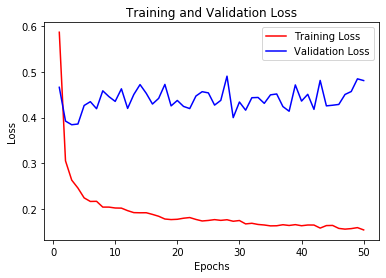

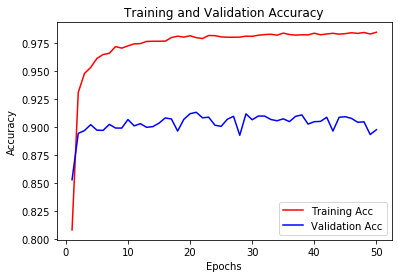

In [30]:
evaluate(dnn_uni, hist_uni, test_uni, 'DNN Unigram')

DNN Unigram-Tfidf Evaluation: 
Accuracy:        0.7986355178829854
ROC AUC Score:   0.8322042543716196
F1 Score:        0.8657440591056955
Precision:       0.9703973796427909
Recall:          0.7814661822525257


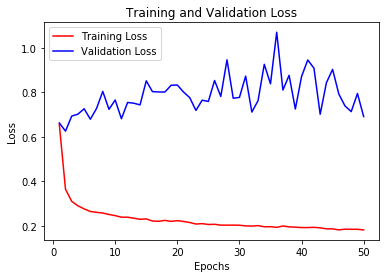

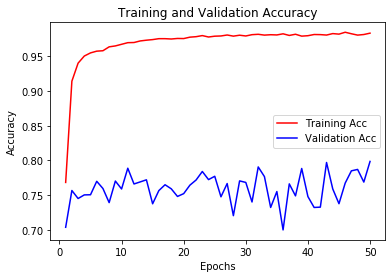

In [31]:
evaluate(dnn_tfu, hist_tfu, test_tfu, 'DNN Unigram-Tfidf')

DNN Bigram Evaluation: 
Accuracy:        0.48145544759148234
ROC AUC Score:   0.6464740642230636
F1 Score:        0.5599185879215356
Precision:       0.9493098524512137
Recall:          0.3970537002936346


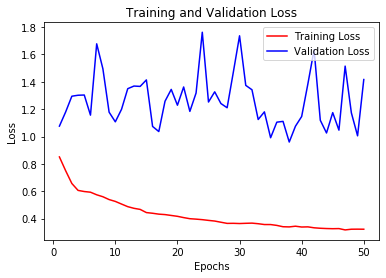

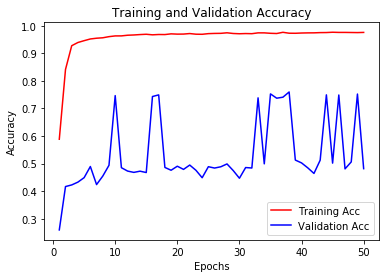

In [11]:
evaluate(dnn_big, hist_big, test_big, 'DNN Bigram')

In [ ]:
evaluate(dnn_tfb, hist_tfb, test_tfb, 'DNN Bigram-Tfidf')

DNN Reduced Unigram Evaluation: 
Accuracy:        0.54103783336779
ROC AUC Score:   0.5304386715652957
F1 Score:        0.6642468239564427
Precision:       0.8467648646564355
Recall:          0.5464589658089882


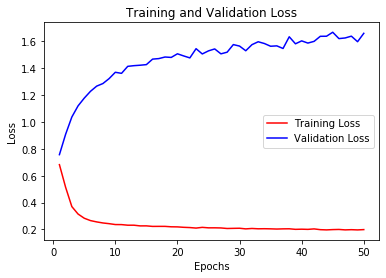

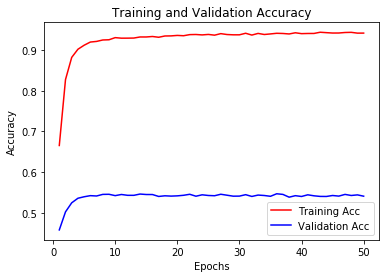

In [32]:
evaluate(dnn_runi, hist_runi, test_runi, 'DNN Reduced Unigram')

DNN Reduced Unigram-Tfidf Evaluation: 
Accuracy:        0.7441389290882778
ROC AUC Score:   0.6242571322431826
F1 Score:        0.8395061728395062
Precision:       0.8765639386881872
Recall:          0.8054546359428657


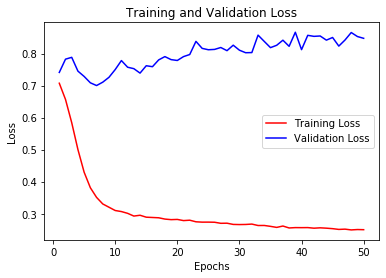

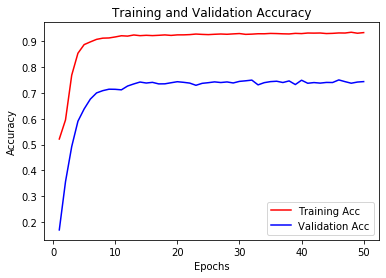

In [33]:
evaluate(dnn_rtfu, hist_rtfu, test_rtfu, 'DNN Reduced Unigram-Tfidf')

DNN Reduced Bigram Evaluation: 
Accuracy:        0.3811866859623734
ROC AUC Score:   0.5696850614826784
F1 Score:        0.43332071185157145
Precision:       0.9058097198037043
Recall:          0.28477579256457475


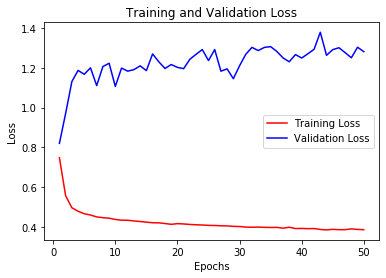

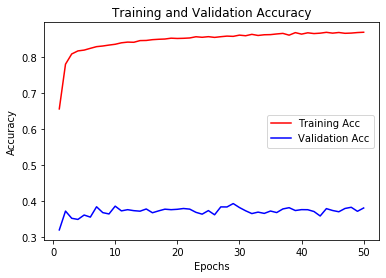

In [34]:
evaluate(dnn_rbig, hist_rbig, test_rbig, 'DNN Reduced Bigram')

DNN Reduced Bigram-Tfidf Evaluation: 
Accuracy:        0.457184205085797
ROC AUC Score:   0.5858415564594333
F1 Score:        0.5450512891599667
Precision:       0.8974095629350679
Recall:          0.39138008261583634


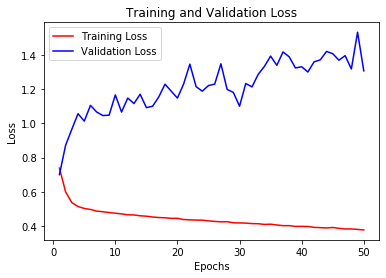

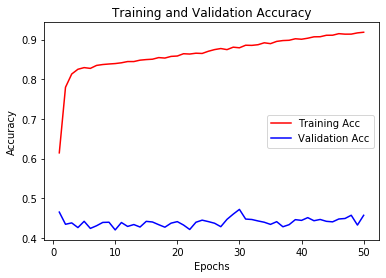

In [35]:
evaluate(dnn_rtfb, hist_rtfb, test_rtfb, 'DNN Reduced Bigram-Tfidf')

# Training Neural Networks - Early Stopping

In [36]:
dnn_uni_s, hist_uni_s = DNN(train_uni, test_uni, early_stop = True)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 200)               2200200   
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 64)                12864     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_22 (Dense)             (None, 4)                 260       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                 5         
Total params: 2,213,329
Trainable params: 2,213,329
Non-trainable params: 0
____________________________________________

In [37]:
dnn_tfu_s, hist_tfu_s = DNN(train_tfu, test_tfu, early_stop = True)

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 200)               2200200   
_________________________________________________________________
dropout_10 (Dropout)         (None, 200)               0         
_________________________________________________________________
dense_25 (Dense)             (None, 64)                12864     
_________________________________________________________________
dropout_11 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 4)                 260       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 5         
Total params: 2,213,329
Trainable params: 2,213,329
Non-trainable params: 0
____________________________________________

In [12]:
dnn_big_s, hist_big_s = DNN(train_big, test_big, early_stop = True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 500)               26500500  
_________________________________________________________________
dropout_3 (Dropout)          (None, 500)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               64128     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 32)                4128      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                

In [ ]:
dnn_tfb_s, hist_tfb_s = DNN(train_tfb, test_tfb, early_stop = True)

In [38]:
dnn_runi_s, hist_runi_s = DNN(train_runi, test_runi, early_stop = True)

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 16)                8816      
_________________________________________________________________
dropout_12 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_30 (Dense)             (None, 1)                 5         
Total params: 8,889
Trainable params: 8,889
Non-trainable params: 0
_________________________________________________________________
756/756 [==============================] - 1s 804us/step - loss: 0.9908 - accuracy: 0.4807
Training Time:   1.7871313095092773
Model Loss:      0.9907848834991455
Model Accuracy:  0.4807111918926239


In [39]:
dnn_rtfu_s, hist_rtfu_s = DNN(train_rtfu, test_rtfu, early_stop = True)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_31 (Dense)             (None, 16)                8816      
_________________________________________________________________
dropout_13 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 4)                 68        
_________________________________________________________________
dense_33 (Dense)             (None, 1)                 5         
Total params: 8,889
Trainable params: 8,889
Non-trainable params: 0
_________________________________________________________________
756/756 [==============================] - 1s 806us/step - loss: 0.6596 - accuracy: 0.6724
Training Time:   2.122189998626709
Model Loss:      0.6595993041992188
Model Accuracy:  0.6723588705062866


In [40]:
dnn_rbig_s, hist_rbig_s = DNN(train_rbig, test_rbig, early_stop = True)

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_34 (Dense)             (None, 100)               265100    
_________________________________________________________________
dropout_14 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 17        
Total params: 266,733
Trainable params: 266,733
Non-trainable params: 0
_________________________________________________________________
756/756 [==============================] - 1s 1ms/step - loss: 0.9619 - accuracy: 0.3699
Training Time:   4.692988157272339
Model Loss:      0.9619255661964417
Model Accuracy:  0.3698987066745758


In [41]:
dnn_rtfb_s, hist_rtfb_s = DNN(train_rtfb, test_rtfb, early_stop = True)

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 100)               265100    
_________________________________________________________________
dropout_15 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 16)                1616      
_________________________________________________________________
dense_39 (Dense)             (None, 1)                 17        
Total params: 266,733
Trainable params: 266,733
Non-trainable params: 0
_________________________________________________________________
756/756 [==============================] - 1s 1ms/step - loss: 0.8895 - accuracy: 0.4301
Training Time:   3.6722970008850098
Model Loss:      0.8894849419593811
Model Accuracy:  0.43005993962287903


# Evaluate Neural Networks - Early Stopping

DNN Early Stop Unigram Evaluation: 
Accuracy:        0.8892702088071118
ROC AUC Score:   0.8931727669173145
F1 Score:        0.9301403453852977
Precision:       0.9773586974398334
Recall:          0.8872741750858508


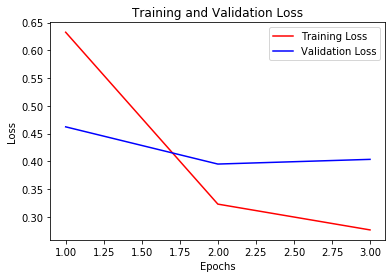

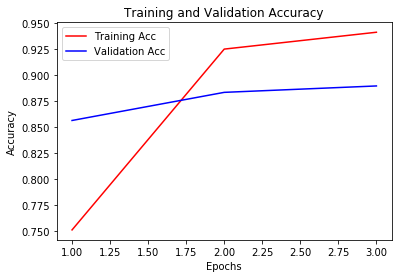

In [42]:
evaluate(dnn_uni_s, hist_uni_s, test_uni, 'DNN Early Stop Unigram')

DNN Early Stop Unigram-Tfidf Evaluation: 
Accuracy:        0.7367376473020467
ROC AUC Score:   0.8148027665976864
F1 Score:        0.814745846547761
Precision:       0.980736901092743
Recall:          0.6968098342706415


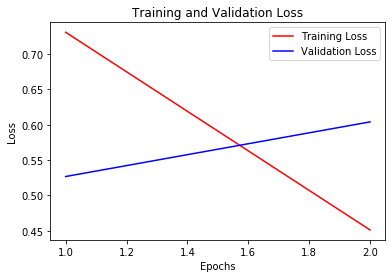

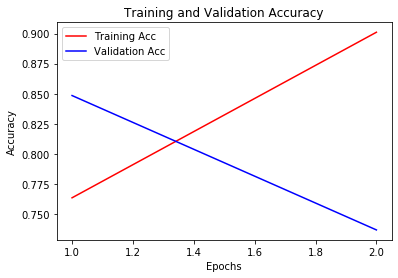

In [43]:
evaluate(dnn_tfu_s, hist_tfu_s, test_tfu, 'DNN Early Stop Unigram-Tfidf')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


DNN Early Stop Bigram Evaluation: 
Accuracy:        0.16919578250982015
ROC AUC Score:   0.5
F1 Score:        0.0
Precision:       0.0
Recall:          0.0


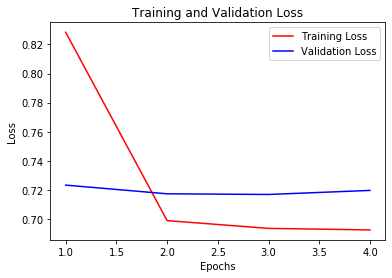

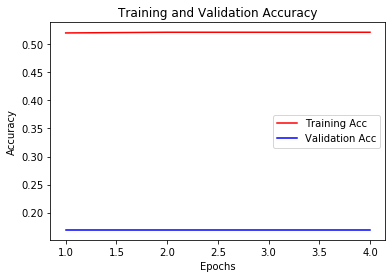

In [13]:
evaluate(dnn_big_s, hist_big_s, test_big, 'DNN Early Stop Bigram')

In [ ]:
evaluate(dnn_tfb_s, hist_tfb_s, test_tfb, 'DNN Early Stop Bigram-Tfidf')

DNN Early Stop Reduced Unigram Evaluation: 
Accuracy:        0.4807111846185652
ROC AUC Score:   0.5119393743822408
F1 Score:        0.5979190011205379
Precision:       0.8380901094956023
Recall:          0.46473896381824514


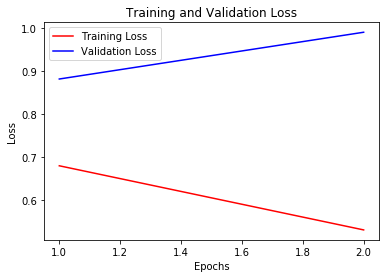

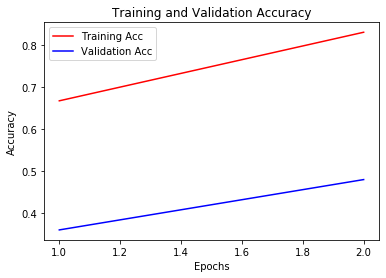

In [44]:
evaluate(dnn_runi_s, hist_runi_s, test_runi, 'DNN Early Stop Reduced Unigram')

DNN Early Stop Reduced Unigram-Tfidf Evaluation: 
Accuracy:        0.6723589001447178
ROC AUC Score:   0.5668514270324321
F1 Score:        0.7864841560681182
Precision:       0.8575121922557142
Recall:          0.7263225999104166


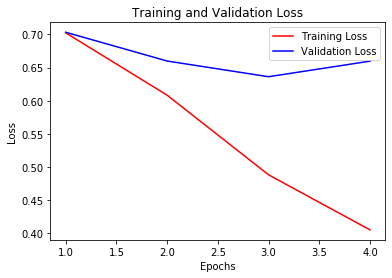

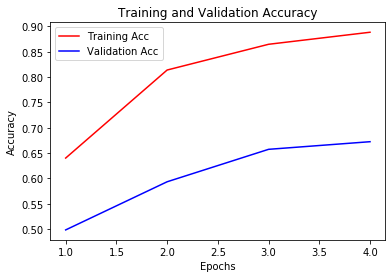

In [45]:
evaluate(dnn_rtfu_s, hist_rtfu_s, test_rtfu, 'DNN Early Stop Reduced Unigram-Tfidf')

DNN Early Stop Reduced Bigram Evaluation: 
Accuracy:        0.36989869753979737
ROC AUC Score:   0.5669784755529992
F1 Score:        0.41507695850765747
Precision:       0.9072147651006711
Recall:          0.269098691086448


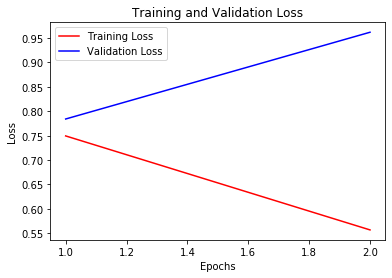

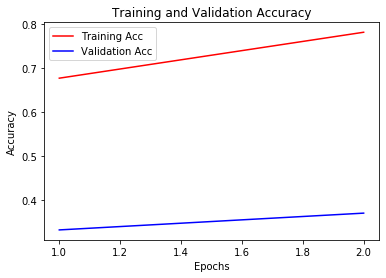

In [46]:
evaluate(dnn_rbig_s, hist_rbig_s, test_rbig, 'DNN Early Stop Reduced Bigram')

DNN Early Stop Reduced Bigram-Tfidf Evaluation: 
Accuracy:        0.43005995451726275
ROC AUC Score:   0.5841132660304559
F1 Score:        0.5059498207885306
Precision:       0.9040604585628282
Recall:          0.3512666102622804


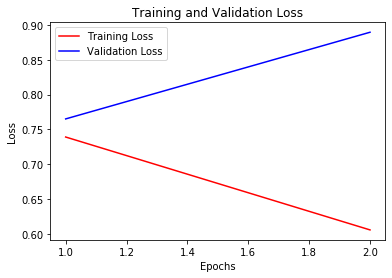

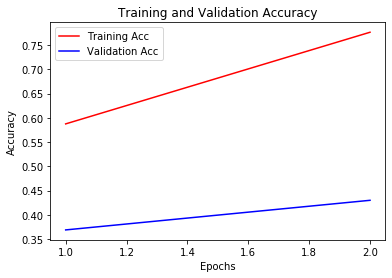

In [47]:
evaluate(dnn_rtfb_s, hist_rtfb_s, test_rtfb, 'DNN Early Stop Reduced Bigram-Tfidf')